In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

!pip install folium==0.5.0

#mport requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
print('Libraries Imported')

     |████████████████████████████████| 81kB 14.6MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
Libraries Imported


## Data Sourcing

In [23]:
# load ny covid daily counts csv
ny_covid_daily_counts_df = pd.read_csv('https://raw.githubusercontent.com/nkkoratp/capstone_data_science_project/master/ny_covid_daily_counts.csv',index_col='Date')
ny_covid_daily_counts_df.head()

# load ny covid cases by borough csv
ny_covid_by_borough_df = pd.read_csv('https://raw.githubusercontent.com/nkkoratp/capstone_data_science_project/master/ny_covid_by_boroughs.csv', index_col='Borough')
ny_covid_by_borough_df.head()

# load ny covid cases by age csv
ny_covid_by_age_df = pd.read_csv('https://raw.githubusercontent.com/nkkoratp/capstone_data_science_project/master/ny_covid_by_age.csv',index_col='Age Group')
ny_covid_by_age_df.head()

# load ny covid cases by gender csv
ny_covid_by_gender_df = pd.read_csv('https://raw.githubusercontent.com/nkkoratp/capstone_data_science_project/master/ny_covid_by_gender.csv',index_col='Gender')
ny_covid_by_gender_df.head()

# load nyc boroughs geojson
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
nyc_geo = r'newyork_data.json'

# load a simplistic nyc boroughs geojson
!wget -q -O 'nyc_data.json' https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/new-york-city-boroughs.geojson
nyc_geo_2 = r'nyc_data.json'

print('Data downloaded!')

Data downloaded!


## Data Visualization

             Number Of Cases Per 100K People
Age Group                                   
0-17 years                               120
18-44 years                             1205
45-64 years                             1895
65-74 years                             2164
        Number Of Cases Per 100K People
Gender                                 
Female                             1133
Male                               1423
               Number Of Cases Per 100K People  Total Counts
Borough                                                     
Staten Island                             1644          8236
Bronx                                     1591         23426
Queens                                    1342         33616
Brooklyn                                  1038         28183
Manhattan                                  730         13740
        Daily Counts
Date                
7-Mar             14
8-Mar             20
9-Mar             54
10-Mar            75
11-Mar           

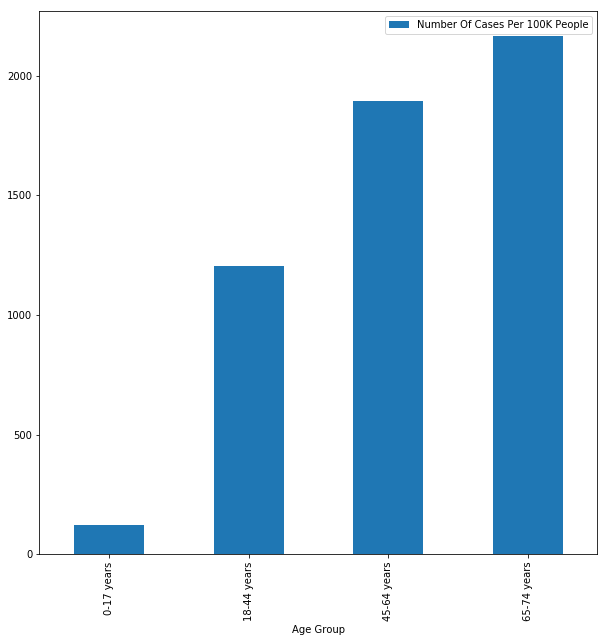

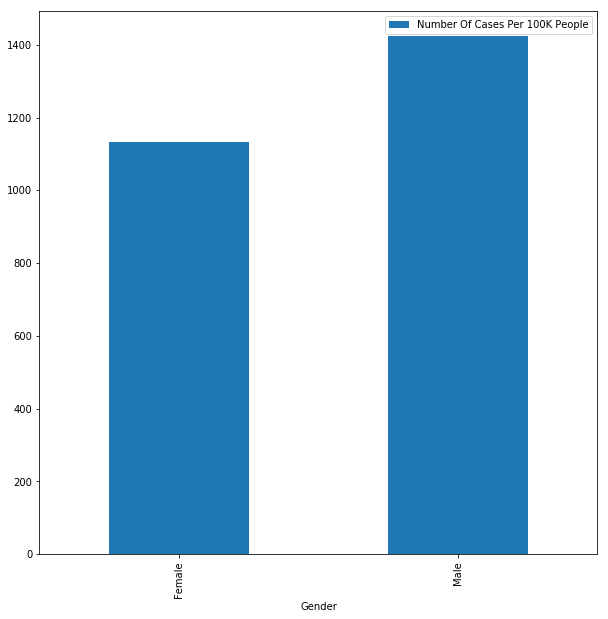

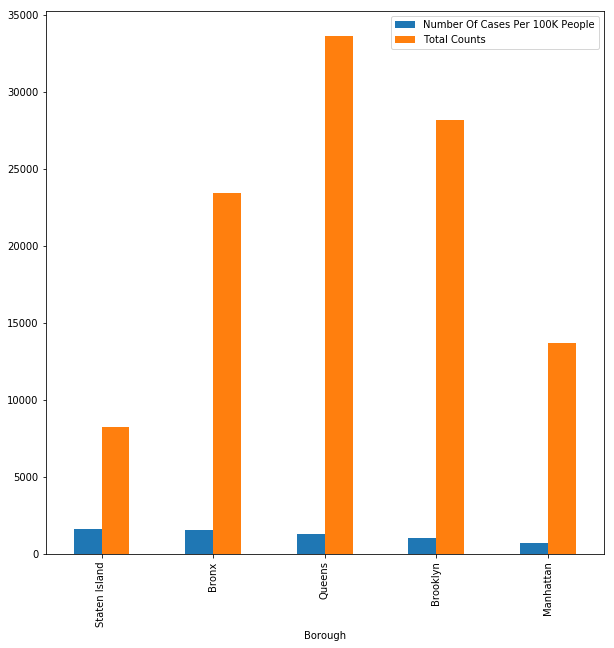

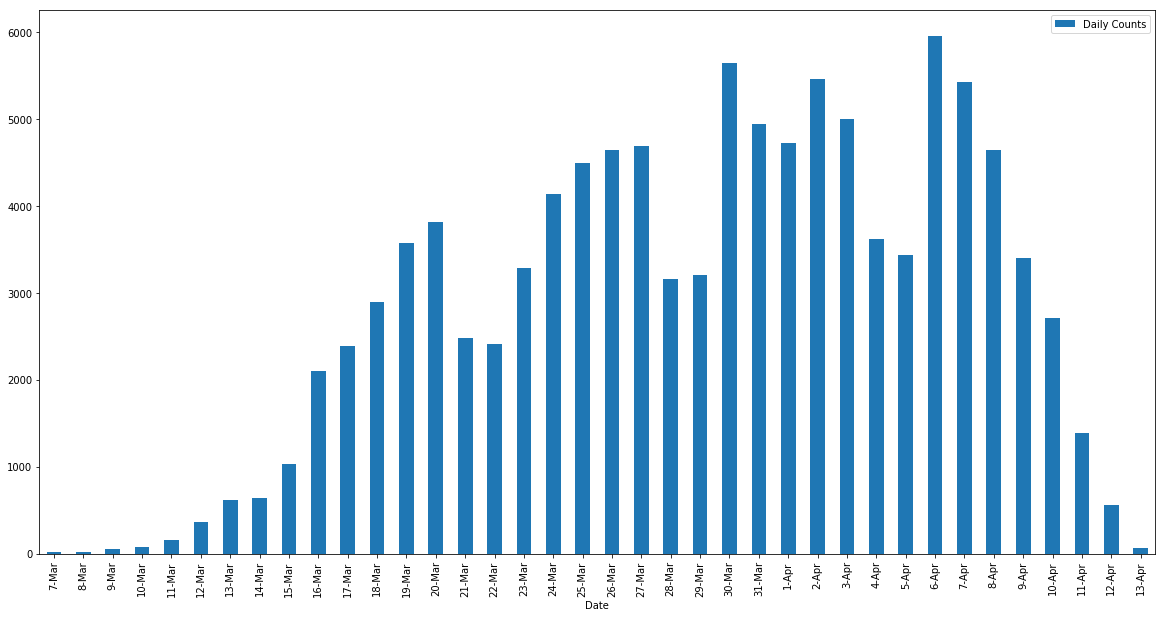

In [16]:
# visualize ny covid case - by age
print(ny_covid_by_age_df)
ny_covid_by_age_df.plot(kind='bar',legend=True,figsize=(10,10))

# visualize ny covid case - by gender
print(ny_covid_by_gender_df)
ny_covid_by_gender_df.plot(kind='bar',legend=True,figsize=(10,10))

# visualize ny covid case - by borough
print(ny_covid_by_borough_df)
ny_covid_by_borough_df.plot(kind='bar',legend=True,figsize=(10,10))

# visualize ny covid case - by date
print(ny_covid_daily_counts_df)
ny_covid_daily_counts_df.plot(kind='bar',legend=True,figsize=(20,10))

In [25]:
# The geograpical coordinate of New York City are 40.7127281, -74.0060152.

ny_covid_by_borough_df = ny_covid_by_borough_df.reset_index()
print(ny_covid_by_borough_df)

nyc_lat = 40.7127281
nyc_lon = -74.0060152
nyc_map = folium.Map(location=[nyc_lat, nyc_lon], zoom_start=11, tiles='OpenStreetMap')

folium.Marker([40.7127281, -74.0060152], popup='<b>Test</b>').add_to(nyc_map)

nyc_map.choropleth(
    geo_data=nyc_geo_2,
    data=ny_covid_by_borough_df,
    columns=["Borough", "Total Counts"],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='NY Borogh COVID counts',
    reset=True
)
display(nyc_map)

   index        Borough  Number Of Cases Per 100K People  Total Counts
0      0  Staten Island                             1644          8236
1      1          Bronx                             1591         23426
2      2         Queens                             1342         33616
3      3       Brooklyn                             1038         28183
4      4      Manhattan                              730         13740
